# Visualizing Algorithm Runtimes in Python
### by Cole Gawin

This notebook demonstrates how you can use visualization libraries and software to determine runtime complexities for different algorithms. We will cover the basic usage of `matplotlib` for visualization of 2d plots and `numpy` for calculating lines of best fit, and then go over how these libraries can be used to determine their runtime complexity through guesstimation or by comparing the plots of their runtimes to that of known functions (i.e. $y=x$, $y=2^n$). 

# Initialization

Before running any visualizations, we must first import the necessary libraries and initialize them.

- `matplotlib` is a library that will create and display the graphs
- `numpy` is a library that consists of numerous mathematical utility functions
- `timeit` is a library that we will use to time how long each call to the algorithm takes
- `math` is the basic Python math library
- `random` is the basic Python randomization library

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import timeit
import math
import random

plt.rcParams['figure.figsize'] = [10, 6] # set size of plot

# Demos

Below are some code segments that demonstrate how to use `matplotlib` and `numpy`.

## `sum` function

The Python `sum` function calculates the sum of all elements of a provided `Iterable`.

This function implements an algorithm with a $O(n)$ runtime complexity. 

To test this, we will use the `linspace` method from the `numpy` library to generate an iterable with 50 evenly-spaced values ranging from 10 to 10,000. The graph, although not a perfectly straight plot, illustrates this.

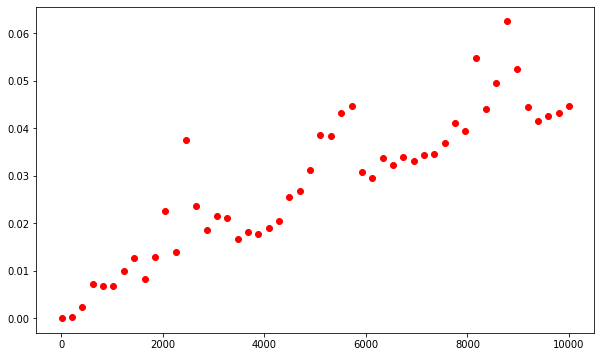

In [15]:
ns = np.linspace(10, 10_000, 50, dtype=int)
ts = [timeit.timeit('sum(range({}))'.format(n), number=100)
      for n in ns]

plt.plot(ns, ts, 'or')

We can add a line of best fit (using a 4th-degree function) to further exemplify this. The graph will never be a perfectly straight-line, but it should come close.

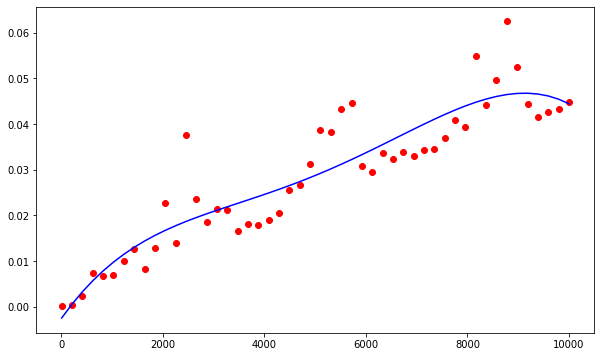

In [16]:
degree = 4
coeffs = np.polyfit(ns, ts, degree)
p = np.poly1d(coeffs)
plt.plot(ns, ts, 'or')
plt.plot(ns, [p(n) for n in ns], '-b')

## List Indexing

Retrieving an item from a list (list indexing) runs with $O(1)$ runtime complexity, which means that the amount of items in the list does not affect how long the algorithm takes to run. How is this represented in a graph?

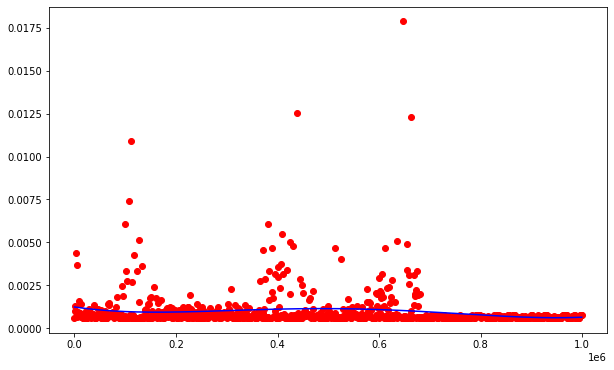

In [17]:
lst = list(range(1_000_000))
ns = np.linspace(0, len(lst), 1000, endpoint=False, dtype=int)
ts = [timeit.timeit('_ = lst[{}]'.format(n),
                    globals=globals(), 
                    number=10000) 
      for n in ns]

plt.plot(ns, ts, 'or')

degree = 4
coeffs = np.polyfit(ns, ts, degree)
p = np.poly1d(coeffs)
plt.plot(ns, [p(n) for n in ns], '-b')

# Algorithms

Now we will look at the graphs produced by the following algorithms:

- linear search
- binary search
- insertion sort

## Linear Search

Linear search has a runtime complexity of $O(n)$, which will be represented by an approximately straight line.

**Red plots** demonstrate searching for an element in a shuffled, **blue plots** demonstrate searching for an element that is not present in the list.

The line of best fit for the red plots will generally be lesser than that of the blue plots because searching for an element that is not present in the list requires iterating through the entire list.

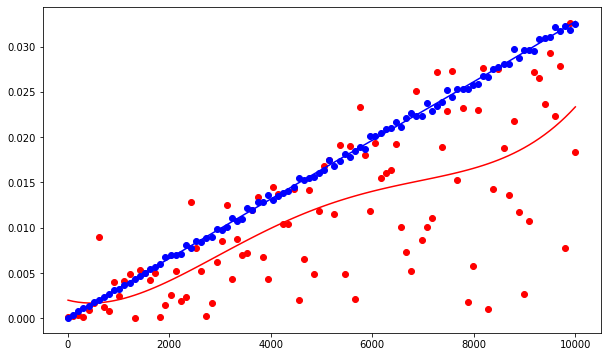

In [18]:
## searches for an item in a list
def contains(lst, x):
    for y in lst:
        if x == y: return True
    return False

ns = np.linspace(10, 10_000, 100, dtype=int)

# red plots
ts = [timeit.timeit('contains(lst, 0)', 
                    setup='lst=list(range({})); random.shuffle(lst)'.format(n),
                    globals=globals(),
                    number=100)
      for n in ns]
plt.plot(ns, ts, 'or')

# line of best fit for red plots
degree = 4
coeffs = np.polyfit(ns, ts, degree)
p = np.poly1d(coeffs)
plt.plot(ns, [p(n) for n in ns], '-r')

# blue plots
ts = [timeit.timeit('contains(lst, -1)', 
                    setup='lst=list(range({}))'.format(n),
                    globals=globals(),
                    number=100)
      for n in ns]
plt.plot(ns, ts, 'ob')

# line of best fit for blue plots
degree = 4
coeffs = np.polyfit(ns, ts, degree)
p = np.poly1d(coeffs)
plt.plot(ns, [p(n) for n in ns], '-b')

## Binary Search

Binary search runs with $O(log\texttt{ }n)$ runtime complexity.

There are some some outliers in the plots of the runtime of this function, but the line of best fit closely resembles a logarithmic function. In a perfect simulation the line of best fit would be identical to a logarithmic function.

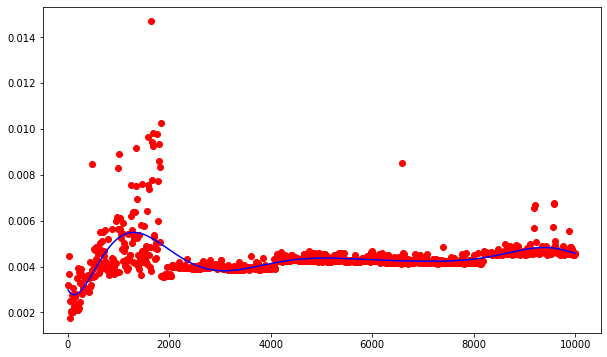

In [19]:
# searches for an item in a list using linear search
def contains(lst, x):
    lo = 0
    hi = len(lst)-1
    while lo <= hi:
        mid = (lo + hi) // 2
        if x < lst[mid]:
            hi = mid - 1
        elif x > lst[mid]:
            lo = mid + 1
        else:
            return True
    else:
        return False

ns = np.linspace(10, 10000, 1000, dtype=int)
ts = [timeit.timeit('contains(lst, {})'.format(n/2), 
                    setup='lst=list(range({}))'.format(n),
                    globals=globals(),
                    number=1000)
      for n in ns]

plt.plot(ns, ts, 'or')

# 10th-degree line of best fit to better illustrate pattern
degree = 10
coeffs = np.polyfit(ns, ts, degree)
p = np.poly1d(coeffs)
plt.plot(ns, [p(n) for n in ns], '-b')

## Insertion Sort

What runtime complexity does insertion sort have? We can use the plots of its runtime and compare those plots against the graphs of known runtimes to determine which is the closest match.

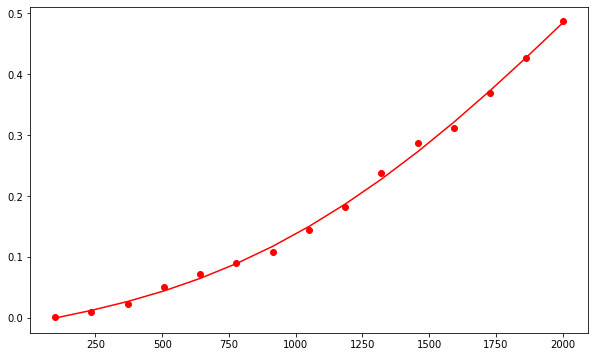

In [20]:
def insertion_sort(lst):
    for i in range(1, len(lst)):
        for j in range(i, 0, -1):
            if lst[j-1] > lst[j]:
                lst[j-1], lst[j] = lst[j], lst[j-1]
            else:
                break

# 15 values
ns = np.linspace(100, 2000, 15, dtype=int)
ts = [timeit.timeit('insertion_sort(lst)',
                    setup='lst=list(range({})); random.shuffle(lst)'.format(n),
                    globals=globals(),
                    number=1)
         for n in ns]
plt.plot(ns, ts, 'or');

degree = 4
coeffs = np.polyfit(ns, ts, degree)
p = np.poly1d(coeffs)
plt.plot(ns, [p(n) for n in ns], '-r')

Now, we can compare that graph with graphs of different runtimes to ultimately determine which is most similar and which runtime complexity insertion sort has.

**Red plots** represent $y=logx$, **blue plots** represent $y=x^2$, **green plots** represent $y=x^x$

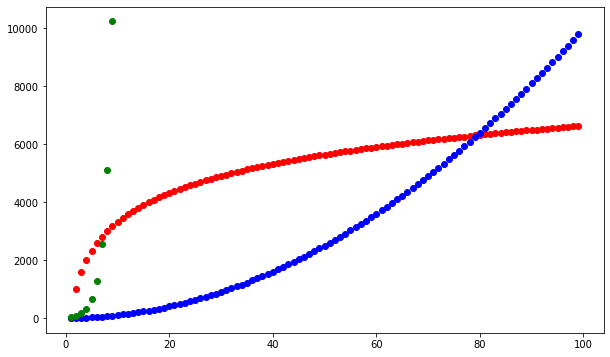

In [21]:
# y = log x
# vertically stretched 1000x
ns = range(1, 100)
ts = [math.log(n, 2) * 1000 for n in ns]
plt.plot(ns, ts, 'or');

# y = x^2
ns = range(1, 100)
ts = [(n*n) for n in ns]
plt.plot(ns, ts, 'ob');

 
# y = 2^x
# vertically stretched 20x
# horizontally compressed 1x
ns = range(1, 10)
ts = [math.pow(2, n)*20 for n in ns]
plt.plot(ns, ts, 'og');

Based on these graphs, it is safe to assume that insertion sort runs in $O(n^2)$ time.

# Mystery function runtime analysis

Can we use visualization of the runtimes of mystery functions to guesstimate their runtime complexities?

## Mystery function `f`

- $O(log n)$
- $O(n)$
- $O(n^3)$
- $O(n log n)$

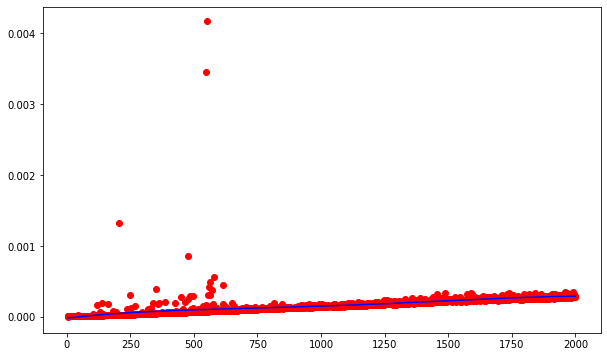

In [23]:
def f(l: list, val): # l is a python list with n items
  d = {}
  for i in range(len(l)):
    d[l[i]] = i
  return d[val]

ns = range(5, 2000)
ts = [timeit.timeit('f(lst, {})'.format(n-1),
                    setup='lst=list(range({})); random.shuffle(lst)'.format(n),
                    globals=globals(),
                    number=1)
         for n in ns]
plt.plot(ns, ts, 'or');

degree = 4
coeffs = np.polyfit(ns, ts, degree)
p = np.poly1d(coeffs)
plt.plot(ns, [p(n) for n in ns], '-b')

Without even comparing this graph to the graphs of the possible runtimes, we can already safely assume that this function has in $O(n)$ runtime.

## Mystery function `g`

- O(n log n)
- O(n^2)
- O(n)
- O(n^3)

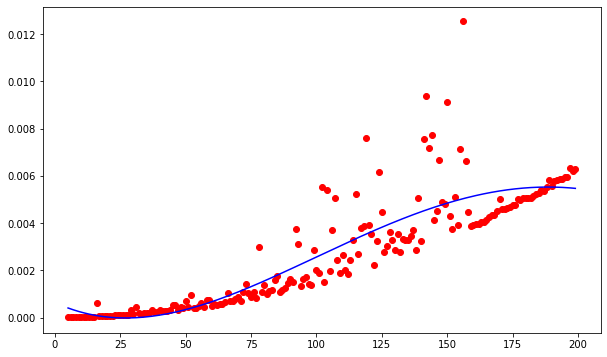

In [24]:
def g(l): # l is a python list of integers of length n
  pairs = [ (i,j) for i in range(len(l)) for j in range(len(l)) if i < j ]
  result = []
  for (i,j) in pairs:
    if l[i] == l[j]:
      result.append((i,j))
  return result

ns = range(5, 200)
ts = [timeit.timeit('g(lst)',
                    setup='lst=list(range({}))'.format(n),
                    globals=globals(),
                    number=1)
         for n in ns]
plt.plot(ns, ts, 'or')

degree = 4
coeffs = np.polyfit(ns, ts, degree)
p = np.poly1d(coeffs)
plt.plot(ns, [p(n) for n in ns], '-b')

This graph looks very similar to the one for insertion sort, so we can determine that this function has a runtime complexity of $O(n^2)$.

## Mystery function `h`

Open-ended question.

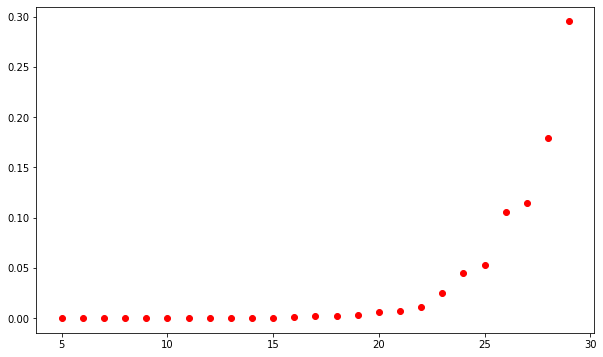

In [25]:
def h(n):
   if n <= 1:
       return n
   else:
       return h(n-1) + h(n-2)

ns = range(5, 30)
ts = [timeit.timeit('h({})'.format(n),
                    globals=globals(),
                    number=1)
         for n in ns]
plt.plot(ns, ts, 'or')

This function is more ambigious than the previous two. It is evident that its runtime must be greater than $O(n)$ as the slope increases as $n$ increases. Let's consider the graphs of runtimes $n^2$ in **red** and $2^n$ in **blue**.

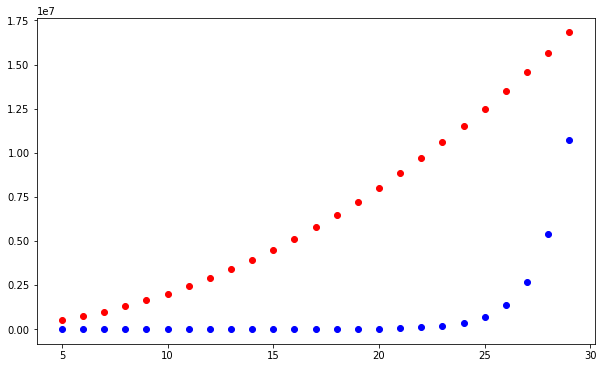

In [26]:
# y = n^2
# vertically stretched 20x
ns = range(5, 30)
ts = [n*n*20000 for n in ns]
plt.plot(ns, ts, 'or')

# y = 2^n
# vertically compressed 50x
ns = range(5, 30)
ts = [math.pow(2, n)/50 for n in ns]
plt.plot(ns, ts, 'ob')

The graph of the runtime of mystery function `h` more closely resembles the blue plots, so therefore the runtime complexity of mystery function `h` is $O(2^n)$.

# Conclusion

Using these visualization libraries, we are able to determine the runtime complexities of functions and algorithms by comparing them to plots/graphs of known runtimes (i.e. comparing plots of insertion sort runtime against $y=n^2$). In addition to determining runtime complexities, this methodology can be used to compare the speeds of different algorithms against each other. With only a few lines of code, you can quickly see the speed at which your chosen algorithms will run with large sets of data!

# References

- [https://matplotlib.org/stable/tutorials/introductory/pyplot.html](https://matplotlib.org/stable/tutorials/introductory/pyplot.html)
- [https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html)
- [https://www.programiz.com/python-programming/examples/fibonacci-recursion](https://www.programiz.com/python-programming/examples/fibonacci-recursion)